# Context

Analysis of the temporal and spatial energy (derived measures).

# Imports

In [458]:
from skimage import io
import skimage
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, uniform_filter
import pickle

In [459]:
import imageio
from pathlib import Path
from matplotlib.pyplot import show
from argparse import ArgumentParser

from pyoptflow.plots import compareGraphs

In [460]:
from PIL import Image
import os
from scipy.signal import argrelextrema
from skimage import exposure

In [461]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

In [462]:
import matplotlib.animation
from IPython.display import HTML
matplotlib.rcParams['animation.embed_limit'] = 2**128

### Import our custom utility methods

In [463]:
import sys
%reload_ext autoreload
%autoreload 2
sys.path.append('../..')

from utils.visualization_tools import *
import utils.visualization_tools
from utils.data_transformations import *
import utils.data_transformations
from utils.diverse import *
import utils.diverse

In [464]:
def plot_histogram(hist, bins, ax = None):
    if type(ax) == type(None):
        fig, ax = plt.subplots(1)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    ax.bar(center, hist, align='center', width=width)

In [465]:
datasets_folder = "../../../../datasets/contrast_to_pixelwise_mean/"
files = [f for f in os.listdir(datasets_folder) if "_mean" in f]
files.sort()
means = [np.load(os.path.join(datasets_folder, f)) for f in files]

In [466]:
files

['runstart13_mean.npy',
 'runstart16_mean.npy',
 'runstart20_mean.npy',
 'runstart23_mean.npy',
 'runstart26_mean.npy']

# Check why spatial gradient is above zero at baseline

In [467]:
files = os.listdir(datasets_folder)
files.sort()

In [468]:
print(files)

['metainfo.txt', 'runstart13.npy', 'runstart13_mean.npy', 'runstart16.npy', 'runstart16_mean.npy', 'runstart20.npy', 'runstart20_mean.npy', 'runstart23.npy', 'runstart23_mean.npy', 'runstart26.npy', 'runstart26_mean.npy']


In [469]:
t = np.load(os.path.join(datasets_folder, "runstart23.npy"))
t = t[:2500]

In [470]:
t_normal = np.load(os.path.join(datasets_folder, "runstart20.npy"))
t_normal = t_normal[:2500]

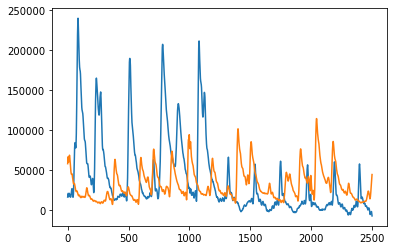

In [471]:
plt.plot(np.nansum(t, axis=(1,2)))
plt.plot(np.nansum(t_normal, axis=(1,2)))

In [472]:
def spatial_energy(t):
    grad = np.gradient(t[:], axis=(1,2))
    spatial_energy = 0.5*(grad[0]**2 + grad[1]**2)
    return spatial_energy

In [473]:
spatial_e = spatial_energy(t)
spatial_e_norm = spatial_energy(t_normal)
integ_spatial_e = np.nansum(spatial_e, axis=(1,2))
integ_spatial_e_norm = np.nansum(spatial_e_norm, axis=(1,2))

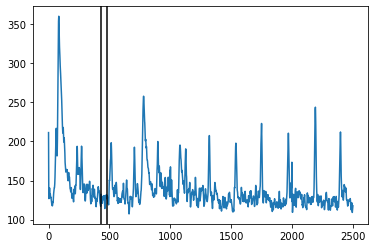

In [474]:
plt.plot(integ_spatial_e)
plt.axvline(430, c="black")
plt.axvline(480, c="black")

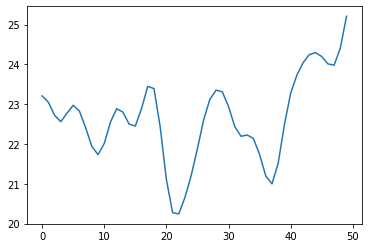

In [475]:
plt.plot(integ_spatial_e_norm[430:480])

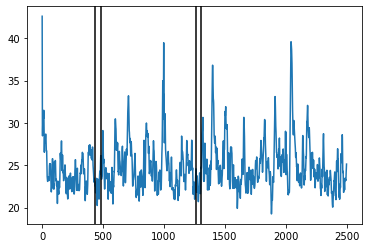

In [476]:
plt.plot(integ_spatial_e_norm)
plt.axvline(430, c="black")
plt.axvline(480, c="black")

plt.axvline(1260, c="black")
plt.axvline(1300, c="black")

In [477]:
#plt.plot(integ_spatial_e[1260:1300])

In [478]:
#plt.plot(integ_spatial_e[430:480])

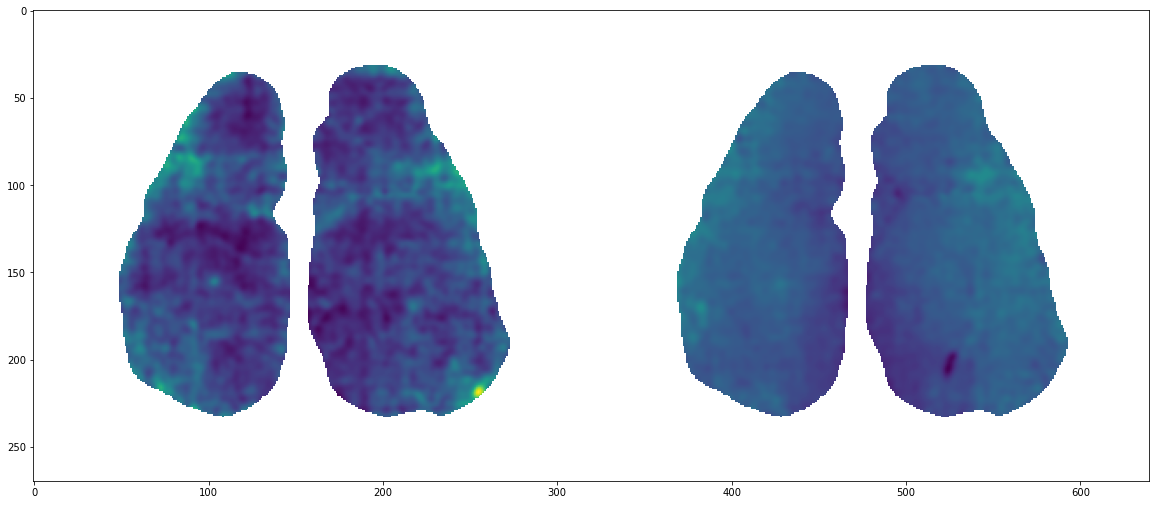

In [479]:
fig, ax = plt.subplots(1, figsize=(20,20))
ax.imshow(np.hstack([np.mean(t[430:480], axis=0), np.mean(t_normal[430:480], axis=0)]))

In [452]:
np.nanstd(t[430:480])

0.2888370525981745

In [453]:
np.nanstd(t_normal[430:480])

0.18459487432082508

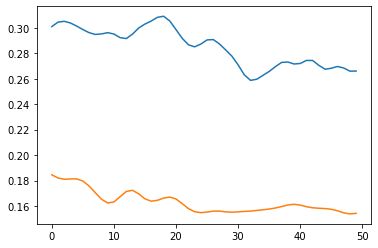

In [457]:
plt.plot(np.nanstd(t[430:480], axis=(1,2)))
plt.plot(np.nanstd(t_normal[430:480], axis=(1,2)))

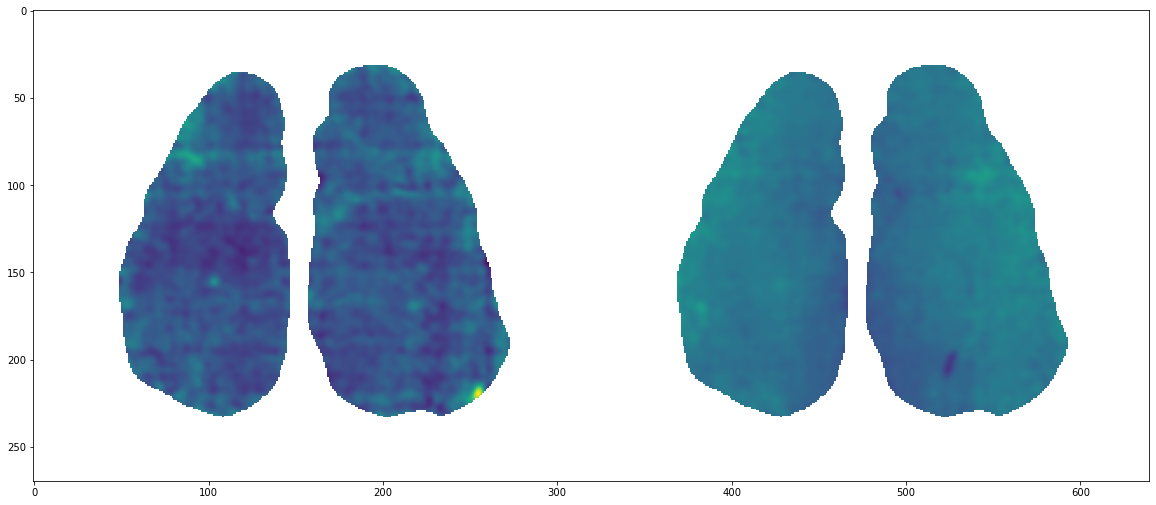

In [436]:
fig, ax = plt.subplots(1, figsize=(20,20))
ax.imshow(np.hstack([np.mean(t[1260:1300], axis=0), np.mean(t_normal[430:480], axis=0)]))

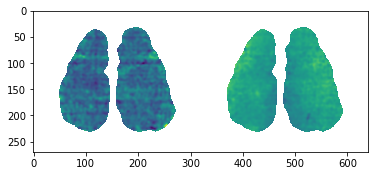

In [447]:
plt.imshow(np.hstack([np.mean(t[1260:1261], axis=0), np.mean(t_normal[430:431], axis=0)]))

In [443]:
corr = spatial_energy(t[:,:200,:150])
corr1 = spatial_energy(t_normal[:,:200,:150])

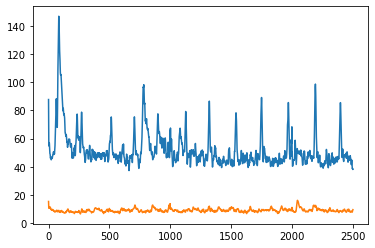

In [444]:
plt.plot(np.nansum(corr, axis=(1,2)))
plt.plot(np.nansum(corr1, axis=(1,2)))

In [385]:
def framewise_histograms(t, val_range=(-1,1)):
    histograms = []
    x = None
    for i in range(len(t)):
        y, x = np.histogram(t[i][~np.isnan(t[i])], range=val_range, bins=100)
        histograms.append(y)
    x = x[:-1]
    histograms = np.array(histograms)
    return np.rot90(histograms), x

In [401]:
histograms, x = framewise_histograms(spatial_e, (-.05,.15))

In [402]:
histograms_normal, x = framewise_histograms(spatial_e_norm, (-.05,.15))

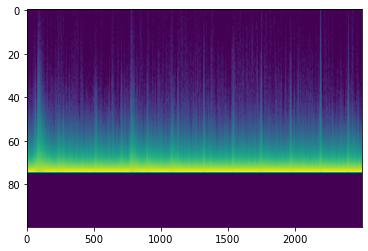

In [403]:
plt.imshow(np.log(histograms+1), aspect="auto")

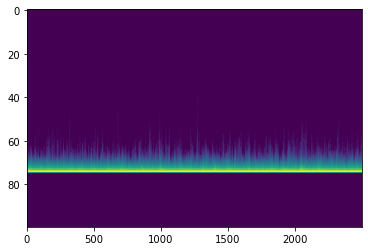

In [404]:
plt.imshow(np.log(histograms_normal+1), aspect="auto")

In [ ]:
plt.imshow(histograms, aspect="auto")

In [354]:
#plt.plot(np.nanmean(t, axis=(1,2)), c="r")

In [405]:
tnorm = t-np.nanmin(t)
tnorm /= np.nanmax(tnorm)

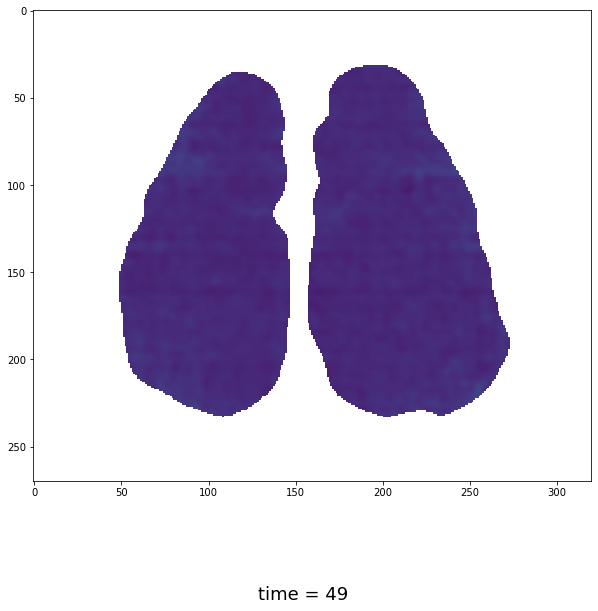

In [448]:
HTML(show_video(tnorm[430:], n_frames=480-430))

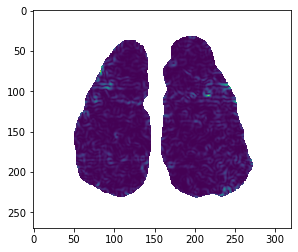

In [245]:
plt.imshow(magn[40])

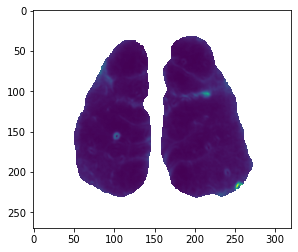

In [181]:
plt.imshow(np.mean(magn,axis=0))

In [134]:
np.nansum(magn)

2533.5367672690704

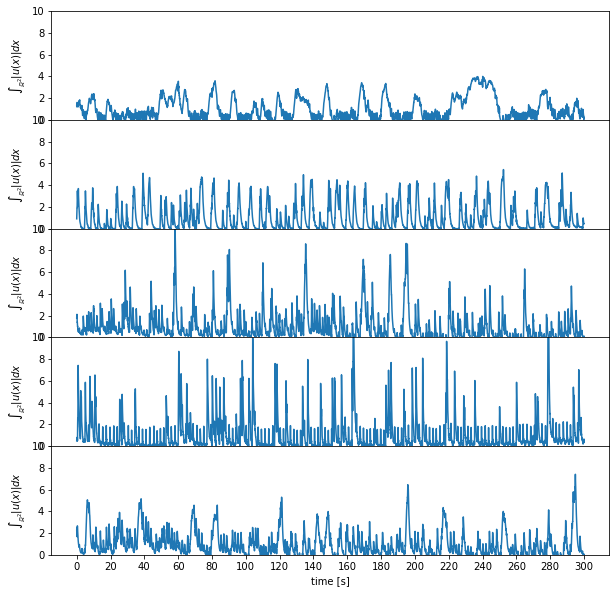

<Figure size 432x288 with 0 Axes>

In [10]:
fig, ax = plt.subplots(len(means), figsize=(10,10))

gs = gridspec.GridSpec(len(means), 1, height_ratios=np.ones(len(means))) 

for i, mean in enumerate(means):
    ax = plt.subplot(gs[i])
    ax.set_ylabel(r"$\int_{\mathbb{R}^2}\left|u(x)\right|dx$")
    ax.plot(mean)
    ax.set_ylim(0,10)

    if i == len(means)-1:
        ax.set_xlabel("time [s]")
        ax.set_xticks(np.arange(0, len(means[0])+10, 100*20))#100 sampling freq, 20 distance of x_ticks
        ax.set_xticklabels(np.arange(0, len(means[0])+10, 1*20))# +10 such that last tick is shown (300)
plt.subplots_adjust(hspace=.0)
plt.show()
    
plt.tight_layout()

# Local features

In [11]:
root = "../../../../"
contrast_folder = os.path.join(root,"datasets/contrast_to_pixelwise_mean/")
tensor_files = [f for f in os.listdir(contrast_folder) if not "_mean" in f and ".npy" in f]
tensor_files.sort()

In [16]:
tensor_files = [os.path.join(contrast_folder, f) for f in tensor_files]

## Intensity distributions

In [22]:
histograms, bins_of_hists = get_histograms(tensor_files, 1000)

..... .....

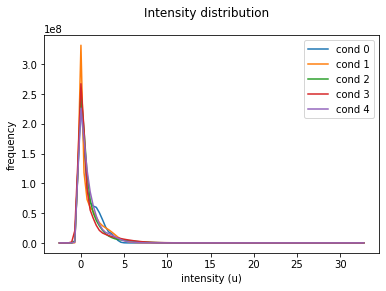

In [18]:
fig, ax = plt.subplots(1)
fig.suptitle("Intensity distribution")
for i, [his, bins] in enumerate(zip(histograms, bins_of_hists)):
    ax.plot(bins[:-1],his, label = "cond " + str(i))
    ax.set_xlabel("intensity (u)")
    ax.set_ylabel("frequency")
    
ax.legend()

# Temporal energy distribution (from precomputed energies)

In [40]:
root = "../../../../"
energy_folder = os.path.join(root,"datasets/temporal_energy/")
temporal_energies = [f for f in os.listdir(energy_folder) if not "_mean" in f and ".npy" in f]
temporal_energies.sort()
temporal_energies = [os.path.join(energy_folder, f) for f in temporal_energies]

In [42]:
temporal_energies

['../../../../datasets/temporal_energy/runstart13.npy',
 '../../../../datasets/temporal_energy/runstart16.npy',
 '../../../../datasets/temporal_energy/runstart20.npy',
 '../../../../datasets/temporal_energy/runstart23.npy',
 '../../../../datasets/temporal_energy/runstart26.npy']

Compute and plot frequency distribution

In [72]:
histograms_temporal, bins_of_hists_temporal = get_histograms(temporal_energies, 1000)

..... .....

.....

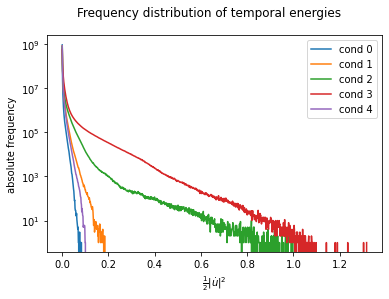

In [74]:
fig, ax = plt.subplots(1)
fig.suptitle("Frequency distribution of temporal energies")
# for i, [his, bins] in enumerate(zip(histograms_temporal, bins_of_hists_temporal)):
    print(".", end="")
    ax.set_yscale('log')
    ax.plot(bins[:-1],his, label = "cond " + str(i))
    ax.set_xlabel(r"$\frac{1}{2}\left \| \dot{u} \right \|^{2}$")
    ax.set_ylabel("absolute frequency")
    
ax.legend()

Now lets have a look at the distribution where we integrate over space

$E_t=\int_{\mathbb{R}^2}{\frac{1}{2}\left|\dot{u}(x)\right|^2dx}$

In [75]:
in_time_temporal = []
for file in temporal_energies:
    print(".", end= "")
    t = np.load( file)
    in_time_temporal.append(np.nansum(t, axis=(1,2)))    

.....

In [76]:
if False:
    fig, ax = plt.subplots(len(in_time), figsize=(10,10))

    gs = gridspec.GridSpec(len(in_time), 1, height_ratios=np.ones(len(in_time))) 

    for i, mean in enumerate(in_time):
        ax = plt.subplot(gs[i])
        ax.set_ylabel(r"$E_t=\int_{\mathbb{R}^2}{\frac{1}{2}\left|\dot{u}(x)\right|^2dx}$")
        ax.plot(mean)

        if i == len(means)-1:
            ax.set_xlabel("time [s]")
            ax.set_xticks(np.arange(0, len(means[0])+10, 100*20))#100 sampling freq, 20 distance of x_ticks
            ax.set_xticklabels(np.arange(0, len(means[0])+10, 1*20))# +10 such that last tick is shown (300)
    plt.subplots_adjust(hspace=.0)
    plt.show()

    plt.tight_layout()

In [28]:
datasets_folder = "../../../../datasets/contrast_to_pixelwise_mean/"
files = [f for f in os.listdir(datasets_folder) if "_mean" in f]
files.sort()
means = [np.load(os.path.join(datasets_folder, f)) for f in files]

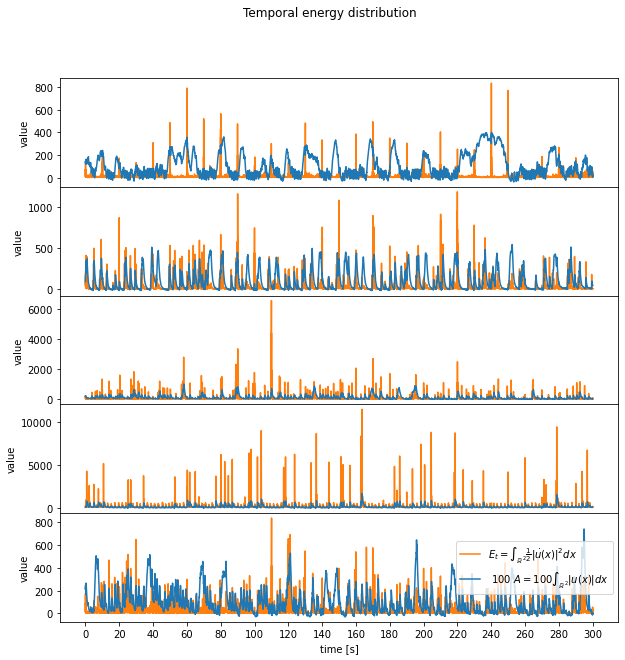

<Figure size 432x288 with 0 Axes>

In [77]:
fig, ax = plt.subplots(len(in_time), figsize=(10,10))

gs = gridspec.GridSpec(len(in_time), 1, height_ratios=np.ones(len(in_time))) 

for i, [mean, in_t] in enumerate(zip(means,in_time)):
    ax = plt.subplot(gs[i])
    ax.set_ylabel("value")
    ax.plot(in_t, label = r"$E_t=\int_{\mathbb{R}^2}{\frac{1}{2}\left|\dot{u}(x)\right|^2dx}$", c='C1')
    ax.plot(mean*100, label=r"$\ 100\ A=100\int_{\mathbb{R}^2}\left|u(x)\right|dx$", c='C0')

    if i == len(means)-1:
        ax.set_xlabel("time [s]")
        ax.set_xticks(np.arange(0, len(means[0])+10, 100*20))#100 sampling freq, 20 distance of x_ticks
        ax.set_xticklabels(np.arange(0, len(means[0])+10, 1*20))# +10 such that last tick is shown (300)
     
        ax.legend(loc="right")

plt.subplots_adjust(hspace=.0)
fig.suptitle("Temporal energy distribution")

plt.show()
plt.tight_layout()

In [79]:
print(1)

1


# Spatial energy distribution (from precomputed energies)

In [58]:
root = "../../../../"
energy_folder = os.path.join(root,"datasets/spatial_energy/")
spatial_energy_files = [f for f in os.listdir(energy_folder) if not "_mean" in f and ".npy" in f]
spatial_energy_files.sort()
spatial_energy_files = [os.path.join(energy_folder, file) for file in spatial_energy_files]

In [62]:
spatial_energy_files

['../../../../datasets/spatial_energy/runstart13.npy',
 '../../../../datasets/spatial_energy/runstart16.npy',
 '../../../../datasets/spatial_energy/runstart20.npy',
 '../../../../datasets/spatial_energy/runstart23.npy',
 '../../../../datasets/spatial_energy/runstart26.npy']

In [70]:
histograms_spatial, bins_of_hists_spatial = get_histograms(temporal_energies, 1000)

..... .....

.....

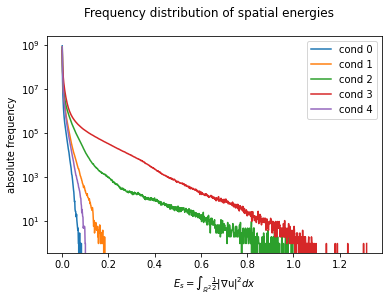

In [71]:
fig, ax = plt.subplots(1)
fig.suptitle("Frequency distribution of spatial energies")
for i, [his, bins] in enumerate(zip(histograms_spatial, bins_of_hists_spatial)):
    print(".", end="")
    ax.set_yscale('log')
    ax.plot(bins[:-1],his, label = "cond " + str(i))
    ax.set_xlabel(r"$E_s=\int_{\mathbb{R}^2}{\frac{1}{2}\left|\mathrm{\nabla u}\right|^2dx}$")
    ax.set_ylabel("absolute frequency")
    
ax.legend()

In [89]:
in_time_spatial = []
for file in spatial_energy_files:
    print(".", end= "")
    t = np.load(file)
    in_time_spatial.append(np.nansum(t, axis=(1,2)))    

.....

In [90]:
datasets_folder = "../../../../datasets/contrast_to_pixelwise_mean/"
files = [f for f in os.listdir(datasets_folder) if "_mean" in f]
files.sort()
means = [np.load(os.path.join(datasets_folder, f)) for f in files]

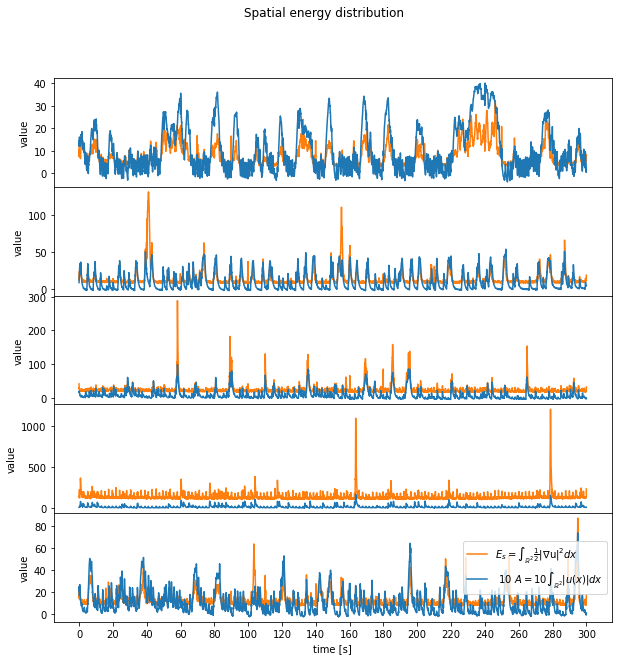

<Figure size 432x288 with 0 Axes>

In [98]:
fig, ax = plt.subplots(len(in_time_spatial), figsize=(10,10))

gs = gridspec.GridSpec(len(in_time_spatial), 1, height_ratios=np.ones(len(in_time_spatial))) 

for i, [mean, in_t] in enumerate(zip(means,in_time_spatial)):
    ax = plt.subplot(gs[i])
    ax.set_ylabel("value")
    ax.plot(in_t, label = r"$E_s=\int_{\mathbb{R}^2}{\frac{1}{2}\left|\mathrm{\nabla u}\right|^2dx}$", c="C1")
    ax.plot(mean*10, label=r"$\ 10\ A=10\int_{\mathbb{R}^2}\left|u(x)\right|dx$", c="C0")

    if i == len(means)-1:
        ax.set_xlabel("time [s]")
        ax.set_xticks(np.arange(0, len(means[0])+10, 100*20))#100 sampling freq, 20 distance of x_ticks
        ax.set_xticklabels(np.arange(0, len(means[0])+10, 1*20))# +10 such that last tick is shown (300)
     
        ax.legend(loc="right")

plt.subplots_adjust(hspace=.0)
fig.suptitle("Spatial energy distribution")
plt.show()

    
plt.tight_layout()

## Spatial engergy distribution

In [ ]:
root = "../../../../"
contrast_folder = os.path.join(root,"datasets/contrast_to_pixelwise_mean/")
tensor_files = [f for f in os.listdir(contrast_folder) if not "_mean" in f and ".npy" in f]

In [ ]:
spatial_energies = []

In [ ]:
for file in tensor_files:
    print(".", end= "")
    t = np.load(os.path.join(contrast_folder, file))
    gradient = np.gradient(t1[:], axis= (1,2))
    temporal_energy = 0.5*(gradient[0]**2 + gradient[1]**2)
    gradient = None
    
    
    spatial_energies.append(temporal_energy)

In [ ]:
plt.imshow(np.mean(tesmag, axis=0))